### Load Data

In [1]:
import pandas as pd
data = pd.read_csv('Data/collected_data.csv')
print(data.shape)
data.head()

(458197, 3)


,id,text,dialect
0,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,IQ
1,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,IQ
2,1175450108898565888,@KanaanRema مبين من كلامه خليجي,IQ
3,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,IQ
4,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,IQ


In [2]:
data['dialect'].value_counts()

EG    57636
PL    43742
KW    42109
LY    36499
QA    31069
JO    27921
LB    27617
SA    26832
AE    26296
BH    26292
OM    19116
SY    16242
DZ    16183
IQ    15497
SD    14434
MA    11539
YE     9927
TN     9246
Name: dialect, dtype: int64

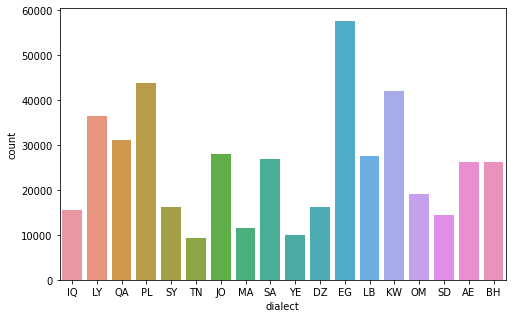

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def plot(data):
    plt.figure(figsize=(8,5))
    sns.countplot(x = data['dialect'], data=data)

plot(data)

In [4]:
# get unique values 
def uniqe(data):
    uniq_dialect = data.dialect.unique()
    print(len(uniq_dialect))
    print(uniq_dialect)

In [5]:
# convert Labels
dict = {
    'EG':0, 'PL':1, 'KW':2, 'LY':3, 'QA':4, 'JO':5, 'LB':6, 'SA':7, 'AE':8, 'BH':9,
    'OM':10, 'SY':11, 'DZ':12, 'IQ':13, 'SD':14, 'MA':15, 'YE':16, 'TN':17
}
data.dialect = data.dialect.map(dict)

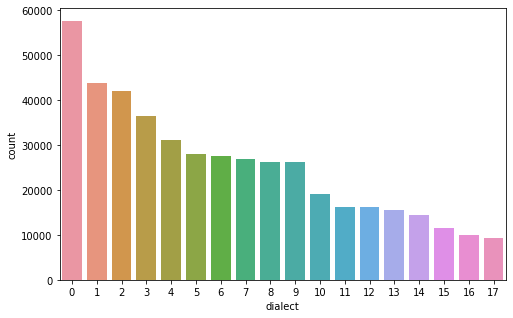

In [6]:
plot(data)

### preprocessing_text as mentioned in [`Aim Technologies blog`](https://aimtechnologies.co/arabic-sentiment-analysis-blog.html?fbclid=IwAR0hlfhCOqd2xpJ3sGUb8yJbN0MzMq4dPPe6swuXwtdbCx1Mrn2I2wei3AM)

In [7]:
# Normalizing similar characters
# Removing tashkeel
# Normalizing mentions and links
# Removing unnecessary or repeated punctuation or characters

import re
from tashaphyne import normalize

def cleaning(text): 
    newtext = re.sub('([@A-Za-z0-9_])|[^\w\s]|#|http\S+|', '', text).replace('\n',' ').lstrip().rstrip()
    return re.sub(r'(.)\1+', r'\1', newtext)

def preprocessing_text(text):
    text = normalize.normalize_searchtext(text)
    return cleaning(text)

In [8]:
# input         ==> text = u'أنا إسَمى أنطـًــــــــــــــــونيوس https://www.facebook.com ملااااااك وديع@vvvv www.google.com'
# preprocessing ==> preprocessing_text(text)
# output        ==>'انا اسمي انطونيوس ملاك وديع'

In [9]:
# make a new column called it processed_text
data['processed_text'] =  data['text'].apply(preprocessing_text)
data.head() 

,id,text,dialect,processed_text
0,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,13,لكن بالنهايه ينتفض يغير
1,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,13,يعني هذا محسوب علي البشر حيونه وحشيه وتطلبون م...
2,1175450108898565888,@KanaanRema مبين من كلامه خليجي,13,مبين من كلامه خليجي
3,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,13,يسلملي مرورك وروحك الحلوه
4,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,13,وين هل الغيبه اخ محمد


In [10]:
# Save data
data.to_csv('Data/processed_data.csv', index=False)

In [11]:
df = pd.read_csv('Data/processed_data.csv')
df.head()

,id,text,dialect,processed_text
0,1175358310087892992,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .,13,لكن بالنهايه ينتفض يغير
1,1175416117793349632,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...,13,يعني هذا محسوب علي البشر حيونه وحشيه وتطلبون م...
2,1175450108898565888,@KanaanRema مبين من كلامه خليجي,13,مبين من كلامه خليجي
3,1175471073770573824,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐,13,يسلملي مرورك وروحك الحلوه
4,1175496913145217024,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺,13,وين هل الغيبه اخ محمد


In [12]:
# check if we have any messing values in processed_text 
# I used this way because type of missing value is float
texts = list(df['processed_text'])
id = list(df['id'])
ids = list()
for i in range(len(texts)):
    text = texts[i]
    ids.append(id[i])
    if len(text)==0:
        print(id)

TypeError: object of type 'float' has no len()

In [13]:
# see this row
print(ids[len(ids)-1])
df[df['id']==1173616403557081088]

1173616403557081088


,id,text,dialect,processed_text
212439,1173616403557081088,This Tweet from @F_0094 has been withheld in r...,7,NaN


In [14]:
# drop this row
df = df[df['id']!=1173616403557081088]
print(data.shape)
print(df.shape)

(458197, 4)
(458196, 4)


In [15]:
# save data
df.to_csv('Data/processed_data.csv', index=False)